In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


Importing the necessary libraries for the model and layers for the neural networks and optimizer is adam

In [2]:


(p_train, q_train), (p_test, q_test) = tf.keras.datasets.cifar10.load_data()

p_train, p_test = p_train / 255.0, p_test / 255.0

170498071/170498071 [==============================] - 3s 0us/step


Im loading the CIFAR-10 dataset using the tensor flow and dataset has 6000 image per class and the total is 60000 32x32 color image in 10 classes
next split the dataset into training and testing sets and x_train conatins traing images and y_train training labels and each pixel is dived in to 255.0 and the scales the pixel value in range of [0,1].


In [3]:
M = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


the above is my model for the image clsssification and it is a cnn model which is convoulution and maxpooling and flatten and dense layer.
the convolution means combiming and the dot product of image and filter we get feature map and max pooling will take the main values from the feature map and then flatten is for dimentionality reduction.

In [4]:
M.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

the above is the model summary for the image classification i used.

In [5]:
M.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Im using the Adam optimizer for the model and the learning rate is
0.001
the loss is sparse_categorical_crossentropy and it will caculate the loss between true and predicted probabilities.
metrics is accuracy.

In [6]:


history = M.fit(p_train, q_train, epochs=20, validation_split=0.2)


M.save('MMM.h5')


Epoch 1/20
1250/1250 [==============================] - 53s 41ms/step - loss: 1.6105 - accuracy: 0.4032 - val_loss: 1.3194 - val_accuracy: 0.5189
Epoch 2/20
1250/1250 [==============================] - 51s 40ms/step - loss: 1.2398 - accuracy: 0.5551 - val_loss: 1.1532 - val_accuracy: 0.5946
Epoch 3/20
1250/1250 [==============================] - 51s 41ms/step - loss: 1.0799 - accuracy: 0.6172 - val_loss: 1.1231 - val_accuracy: 0.6121
Epoch 4/20
1250/1250 [==============================] - 50s 40ms/step - loss: 0.9855 - accuracy: 0.6539 - val_loss: 0.9863 - val_accuracy: 0.6544
Epoch 5/20
1250/1250 [==============================] - 51s 41ms/step - loss: 0.9053 - accuracy: 0.6836 - val_loss: 0.9482 - val_accuracy: 0.6683
Epoch 6/20
1250/1250 [==============================] - 49s 39ms/step - loss: 0.8455 - accuracy: 0.7045 - val_loss: 0.9172 - val_accuracy: 0.6829
Epoch 7/20
1250/1250 [==============================] - 49s 39ms/step - loss: 0.7981 - accuracy: 0.7190 - val_loss: 0.9741 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(




To train the model i took 20 epochs and then i saved the model to predict the given image .

In [7]:

test_loss, test_acc = M.evaluate(p_test, q_test, verbose=2)

print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")


313/313 - 5s - loss: 1.1252 - accuracy: 0.6933 - 5s/epoch - 16ms/step
Test accuracy: 0.6933000087738037, Test loss: 1.1252238750457764


**Visulization**

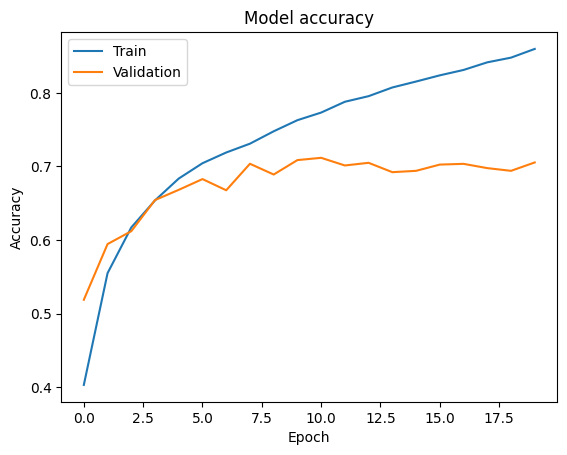

In [8]:
import matplotlib.pyplot as plt_7

plt_7.plot(history.history['accuracy'])
plt_7.plot(history.history['val_accuracy'])
plt_7.title('Model accuracy')
plt_7.ylabel('Accuracy')
plt_7.xlabel('Epoch')
plt_7.legend(['Train', 'Validation'], loc='upper left')
plt_7.show()




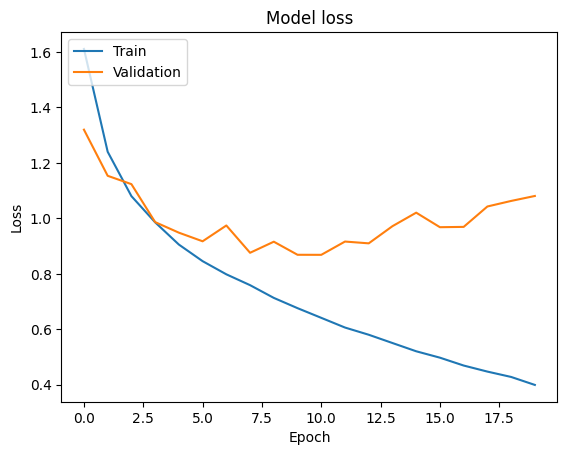

In [9]:
plt_7.plot(history.history['loss'])
plt_7.plot(history.history['val_loss'])
plt_7.title('Model loss')
plt_7.ylabel('Loss')
plt_7.xlabel('Epoch')
plt_7.legend(['Train', 'Validation'], loc='upper left')
plt_7.show()

**Prediction**

In [10]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image


In [11]:
model = load_model('MMM.h5')

In [12]:

def predict_image(img_path):

    img = image.load_img(img_path, target_size=(32, 32))

    img_array = image.img_to_array(img)


    img_array = np.expand_dims(img_array, axis=0)


    img_array /= 255.0


    predictions = model.predict(img_array)


    predicted_class = np.argmax(predictions, axis=1)

    class_labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

    return class_labels[predicted_class[0]]



In [17]:
image_path = '/content/R.jpeg'
predicted_class = predict_image(image_path)
print(f"The image is {predicted_class}.")


1/1 [==============================] - 0s 115ms/step
The image is Truck.


Hyper parameter model

In [18]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch

<ipython-input-19-8d1ff120c7cc>:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [20]:


def build_model(hp):
    model = Sequential([
        Conv2D(
            filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
            kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
            activation='relu',
            input_shape=(32, 32, 3)
        ),
        MaxPooling2D((2, 2)),
        Conv2D(
            filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=16),
            kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
            activation='relu'
        ),
        MaxPooling2D((2, 2)),
        Conv2D(
            filters=hp.Int('conv_3_filter', min_value=32, max_value=128, step=16),
            kernel_size=hp.Choice('conv_3_kernel', values=[3, 5]),
            activation='relu'
        ),
        Flatten(),
        Dense(
            units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
            activation='relu'
        ),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [21]:
(p_train, q_train), (p_test, q_test) = tf.keras.datasets.cifar10.load_data()
p_train, p_test = p_train / 255.0, p_test / 255.0

In [23]:

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=1,
    executions_per_trial=1,
    directory='model_tuning',
    project_name='CIFAR10'
)
tuner.search(p_train, q_train, epochs=10, validation_split=0.2)


Trial 2 Complete [00h 40m 26s]
val_accuracy: 0.675000011920929

Best val_accuracy So Far: 0.7008000016212463
Total elapsed time: 00h 54m 29s


In [24]:
best_model = tuner.get_best_models(num_models=1)[0]

In [25]:
test_loss, test_acc = best_model.evaluate(p_test, q_test, verbose=2)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")

313/313 - 4s - loss: 0.9126 - accuracy: 0.7028 - 4s/epoch - 13ms/step
Test accuracy: 0.7027999758720398, Test loss: 0.9126273393630981
